# Computational methods in Physics
## Week 6
#### Prof. Michael Wood-Vasey
##### [based on materials from Prof. Brian D'Urso]
##### University of Pittsburgh, Department of Physics and Astronomy

## Linear algebra

## Overview
This week's topics:
* Writing and reading arrays to/from files.
* Linear algebra and matrix methods.
* Multidimensional root finding and minimization.
* Curve fitting.

### Matrices

#### Creating Arrays in Numpy
* Creating arrays:
  * Online documentation:  
    http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html
* Writing to a file:
  * Online documentation:  
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html
  * Python help:
  `help(numpy.savetxt)`
* Loading from a file:
  * Online documentation:  
  http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html
  * Python help:  
  `help(numpy.loadtxt)`
* There are other fileIO functions:
  e.g. `numpy.load` and `numpy.save`.
* and other formats (e.g., `hdf`) and frameworks (e.g., `astropy.Tables`).

#### Examples: Arrays and Files
* Setup:

In [1]:
import numpy as np
A = np.array([[0.0, 2.5, 3.2],
              [1.0, 5.6, 8.9],
              [2.0, 7.1, 3.7],
              [3.0, 4.2, 9.3]])

* Save $\mathbf{A}$ to a file:

In [3]:
 np.savetxt('A_test.csv', A,
            delimiter=',', fmt='%g')

* Load the array back from the file:

In [4]:
B = np.loadtxt('_test.csv',
               delimiter=',')

In [5]:
print(B)

[[ 0.   2.5  3.2]
 [ 1.   5.6  8.9]
 [ 2.   7.1  3.7]
 [ 3.   4.2  9.3]]


* Let's take a moment to look at the file. [...] 

In [1]:
foo = {"PHYS" : "Physics", "ASTRON" : "Astronomy"}

In [3]:
print(foo['Physics'])

KeyError: 'Physics'

In [4]:
for key, value in foo.items():
    print(key, value)

PHYS Physics
ASTRON Astronomy


### Linear Algebra

#### Linear Algebra Problems
* The basic linear algebra problem is a set of $m$ simultaneous linear equations with $n$ unknowns:
\begin{equation*}
\begin{matrix}
 \alpha_{0,0}x_0   &+& \alpha_{0,1}x_1   &+& \cdots &+& \alpha_{0,n-1}x_{n-1}  &=& b_0 \\
 \alpha_{1,0}x_0   &+& \alpha_{1,1}x_1   &+& \cdots &+& \alpha_{1,n-1}x_{n-1}  &=& b_1 \\
 \vdots            &+& \vdots            &+& \ddots &+& \vdots                 &=& \vdots \\
 \alpha_{m-1,0}x_0 &+& \alpha_{m-1,1}x_1 &+& \cdots &+& \alpha_{m-1,n-1}x_{n-1}&=& b_{m-1} \\
\end{matrix}
\end{equation*}
* Typically, we know $\alpha_{i,j}$ and $b_i$, and want to find $x_j$.
* If $m>n$, the system is overdetermined.
* If $m<n$, the system is underdetermined.
* We will look primarily at the case $n=m$.

#### Matrix Representation
* Computers are better able to handle equations as matrix equations.
* Matrix representation:

\begin{equation*}
\begin{pmatrix}
\alpha_{0,0}   & \alpha_{0,1}   & \cdots & \alpha_{0,n-1}   \\
\alpha_{1,0}   & \alpha_{1,1}   & \cdots & \alpha_{1,n-1}   \\
\vdots         & \vdots         & \ddots & \vdots           \\
\alpha_{m-1,0} & \alpha_{m-1,1} & \cdots & \alpha_{m-1,n-1} \\
\end{pmatrix}
\begin{pmatrix}
x_0 \\
x_1 \\
\vdots \\
x_{n-1} \\
\end{pmatrix}
=
\begin{pmatrix}
b_0 \\
b_1 \\
\vdots \\
b_{m-1} \\
\end{pmatrix}
\end{equation*}

* We can write this set of equations in a compact form, writing the matrix as $\mathbf{A}$:

\begin{equation*}
\mathbf{A}\vec{x} = \vec{b}
\end{equation*}

* Here $\mathbf{A}$ is a square matrix.

#### Classes of Matrix Problems
$\mathbf{A}\vec{x}=\vec{b}$
* $\mathbf{A}$ is a known $N \times N$ matrix.
* $\vec{x}$ is an unknown vector of length $N$.
* $\vec{b}$ is a known vector of length $N$.
* Solve with Gaussian elimination
 or lower-upper (LU) decomposition.
* Slower: solve by finding $\mathbf{A}^{-1}$, then $\vec{x}=\mathbf{A}^{-1}\vec{b}$.
$\mathbf{A}\vec{x}=\lambda\vec{x}$
* Eigenvector $\vec{x}$ is an unknown vector of length $N$.
* Eigenvalue $\lambda$ is an unknown parameter.
* $\mathbf{A}^{-1}$ doesn't help! Need specialized solver.
* Can shown that $\textrm{det}[\mathbf{A}-\lambda\mathbf{I}] = 0$ for eigenvalues $\lambda$.

#### Linear Algebra Routines
* We *will* solve linear algebra problems with "canned" routines.
* Eigensystems, matrix multiplication, inverses, determinants, etc.
* Many tested and optimized packages available:
NETLIB, LAPACK, SLATEC, BLAS, \ldots
* Writing custom solvers "from scratch" is not usually worthwhile for these.
* NumPy and SciPy wrap some of these.
* We will primarily use the NumPy routines in `numpy.linalg`.

#### Linear Algebra in Numpy
Common linear algebra functions available in `numpy`:
* Online documentation:
  http://docs.scipy.org/doc/numpy/reference/routines.linalg.html
* Python help:
  `help(numpy.linalg)`

#### Examples: Solving Linear Systems
* Setup matrices:

In [1]:
import numpy as np
A = np.array([[ 1,  2,   3],
              [22, 32,  42],
              [55, 66, 100]])
b = np.array([1, 2, 3])

* Solve $\mathbf{A}\vec{x}=\vec{b}$:

In [2]:
x = np.linalg.solve(A, b)
print(x)

[-1.4057971  -0.1884058   0.92753623]


* Check accuracy of the solution by calculating $\mathbf{A}\vec{x}-\vec{b}$:

In [9]:
np.dot(A, x) - b

array([  4.44089210e-16,   1.77635684e-15,  -3.55271368e-15])

* Less efficient direct solution, $\vec{x}=\mathbf{A}^{-1}\vec{b}$:

In [4]:
A_inverse = np.linalg.inv(A)

print(np.dot(A_inverse, A))
x = np.dot(A_inverse, b)


[[  1.00000000e+00  -1.33226763e-15  -1.77635684e-15]
 [  8.88178420e-16   1.00000000e+00   0.00000000e+00]
 [ -4.44089210e-16   4.44089210e-16   1.00000000e+00]]


In [13]:
print(x)

[-1.4057971  -0.1884058   0.92753623]


#### Examples: Solving Eigensystems
Solve for the principle axes of a cube,
where the moment of inertia tensor $\mathbf{I}$ is diagonal.
* Solve $\mathbf{I}\vec{\omega}= \lambda\vec{\omega}$ for eigenvectors $\vec{\omega}$ and eigenvalues $\lambda$.
* Setup:

In [6]:
import numpy as np
I = np.array([[ 2./3,-1./4,-1./4],
              [-1./4, 2./3,-1./4],
              [-1./4,-1./4, 2./3]])

* Solve eigensystem:

In [7]:
evalues, evectors = np.linalg.eig(I)

In [8]:
print("Eigenvectors: ")
print(evectors)

print("Eigenvalues: ")
print(evalues)

Eigenvectors: 
[[ 0.81649658 -0.57735027  0.43514263]
 [-0.40824829 -0.57735027 -0.81589244]
 [-0.40824829 -0.57735027  0.38074981]]
Eigenvalues: 
[ 0.91666667  0.16666667  0.91666667]


* Evaluate difference between RHS and LHS of $\mathbf{I}\vec{\omega}= \lambda\vec{\omega}$:

In [12]:
LHS = np.dot(I, evectors[:, 0])
RHS = evalues[0] * evectors[:, 0]
LHS - RHS

array([  1.11022302e-16,  -1.11022302e-16,  -1.66533454e-16])

Excellent, the LHS and RHS look equal to something approaching machine precision.

#### Multidimensional Nonlinear Root Finding
The general problem of finding roots of multiple nonlinear simultaneous equations $f(x, y)$ and $g(x, y)$ is difficult:

![](figures/multidimensional_root_finding.png)

#### Multidimensional Newton-Raphson
Consider $N$ nonlinear functions of $N$ variables, $F_i(x_1, x_2, \ldots , x_N)$.  
Find the $\vec{x}$ which gives $F_i(\vec{x}) = 0$
 for all $i$.
* Taylor expansion:
\begin{equation*}
\vec{F}(\vec{x}+ \delta\vec{x}) = \vec{F}(\vec{x}) + \mathbf{J}\cdot \delta\vec{x} + \mathcal{O}(\delta\vec{x}^2)
\end{equation*}
where $\mathbf{J}$ is the Jacobian matrix with $J_{ij} = \frac{\partial F_i}{\partial x_j}$.
* Set $\vec{F}(\vec{x}+ \delta\vec{x})=0$ to get an approximate solution:
\begin{equation*}
\mathbf{J}\cdot \delta\vec{x} = -\vec{F}(\vec{x})
\end{equation*}
* Solve for $\delta\vec{x}$ to get the Newton-Raphson step:
\begin{equation*}
\vec{x}_{\rm new} = \vec{x}_{\rm old} + \delta\vec{x}
\end{equation*}
* Need to use matrix mathods (e.g. LU decomposition) to get $\delta\vec{x}$.

#### Function Minimization
What if the problem is to minimize a function instead of finding a zero?
* There are routines similar to the bisection and Newton-Raphson methods for minimization.
* Multidimensional minimization (optimization) is better behaved than multidimensional root finding.
* Many Scipy optimization routines:
  * Online documentation:
  http://docs.scipy.org/doc/scipy/reference/optimize.html
  * Python help:
  `help(scipy.optimize)`
  * Many trade-offs between speed, memory use, robustness, \ldots
  * Ideal technique is problem-dependent.

In [9]:
import scipy.optimize
help(scipy.optimize)

Help on package scipy.optimize in scipy:

NAME
    scipy.optimize

DESCRIPTION
    Optimization and root finding (:mod:`scipy.optimize`)
    
    .. currentmodule:: scipy.optimize
    
    Optimization
    
    Local Optimization
    ------------------
    
    .. autosummary::
       :toctree: generated/
    
       minimize - Unified interface for minimizers of multivariate functions
       minimize_scalar - Unified interface for minimizers of univariate functions
       OptimizeResult - The optimization result returned by some optimizers
    
    The `minimize` function supports the following methods:
    
    .. toctree::
    
       optimize.minimize-neldermead
       optimize.minimize-powell
       optimize.minimize-cg
       optimize.minimize-bfgs
       optimize.minimize-newtoncg
       optimize.minimize-lbfgsb
       optimize.minimize-tnc
       optimize.minimize-cobyla
       optimize.minimize-slsqp
       optimize.minimize-dogleg
       optimize.minimize-trustncg
    
    Th

### Curve Fitting

#### Curve Fitting
Find the parameters $\vec{a}=(a_1, a_2, \ldots, a_M)$ that make the function $f(x, \vec{a})$ fit the data $(x_i, y_i)$ with standard deviations (errors) $\sigma_i$ as well as possible.
* A common approach is to adjust $\vec{a}$ to minimize the sum of the squares of the weighted errors, called $\chi^2$:
\begin{equation*}
\chi^2 = \sum_{i=0}^{N} \left[\frac{y_i - f(x_i, \vec{a})}{\sigma_i}\right]^2
\end{equation*}
* For normally distributed data,
 minimum $\chi^2 \Rightarrow$ maximum likelihood.
* $1/\sigma_i^2$ = weighting $\Rightarrow$ large errors contribute least.
* Smaller $\chi^2 \Rightarrow$ better fit.
* $\chi^2 \approx N - M =$ \# degrees freedom, good.
* Good fit: misses $\sim 1/3$ of points.
* $\chi^2 = 0 \Rightarrow$ theory passes through all data points.

#### Example: Linear Regression
Fitting data to a line (called Simple Linear Regression) is particularly easy.   
e.g. fit a line, $y = m * x + c * 1$, through some noisy data-points:
* Setup and make some data:

In [10]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

* By inspecting or plotting, we see that the line should have a slope of roughly $1$ and cut the y-axis at $-1$.

(-2, 3)

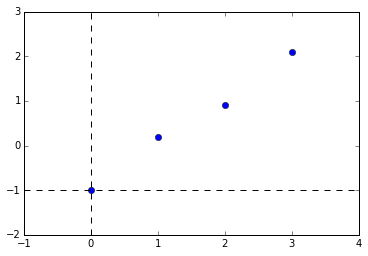

In [13]:
plt.plot(x,       y, linestyle='' , marker='o', color='blue', label='data')
plt.axhline(-1, linestyle='dashed', color='black')
plt.axvline(0, linestyle='dashed', color='black')
plt.xlim(-1,4)
plt.ylim(-2,3)

* We can rewrite the line equation as $\mathbf{A}\vec{p} = \vec{y}$,  
 where `A = [[x 1]]` and `p = [[m], [c]]`.  
Now use `lstsq` to solve for `p`:

In [15]:
A = np.column_stack([x, np.ones(len(x))])
m, c = np.linalg.lstsq(A, y)[0]

In [19]:
np.linalg.lstsq(A, y)[0]

array([ 1.  , -0.95])

#### Example: Linear Regression, Plotting
* Plot the data along with the fitted line:

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

(-2, 3)

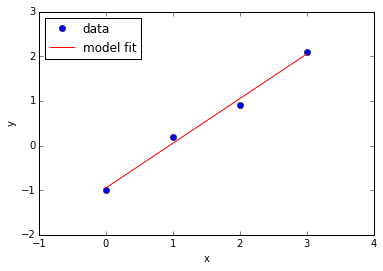

In [17]:
plt.plot(x,       y, linestyle='' , marker='o', color='blue', label='data')
plt.plot(x, m*x + c, linestyle='-', color='red', label='model fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(numpoints=1, loc='upper left')
plt.xlim(-1,4)
plt.ylim(-2,3)

### Linear Regression means linear in the *coefficients*.
### It doesn't have to be a straight line.

Let's fit $y = a + b x + c x^2$

In [27]:
import numpy as np
x = np.array([0, 0.5, 1, 1.2, 2, 2.7, 3])
(a, b, c) = (1.5, 2, 4)
y = np.polyval([c,b,a], x)  # polyval expects coefficients from largest to smallest power of x
# Add some noise
(mu, sigma) = (0, 1)
y += np.random.normal(mu, sigma, size=len(x))

In [28]:
print(y)

[  0.24946239   4.00398772   7.68805203  10.41142068  21.24199763
  36.22010636  43.72138877]


In [29]:
A = np.column_stack([x**2, x, np.ones(len(x))])
(fit_c, fit_b, fit_a) = np.linalg.lstsq(A, y)[0]

In [33]:
print(fit_c, fit_b, fit_a)

3.60595950093 3.4173196633 0.733048821144


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

(-1, 4)

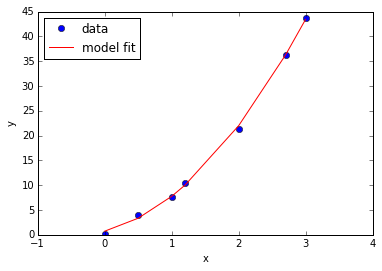

In [35]:
fit_y = np.polyval([fit_c, fit_b, fit_a], x)
plt.plot(x,     y, linestyle='' , marker='o', color='blue', label='data')
plt.plot(x, fit_y, linestyle='-', color='red', label='model fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(numpoints=1, loc='upper left')
plt.xlim(-1,4)
# plt.ylim(-2,3)

And just to really drive the point home, let's fit $y = a + b x + c \sin(x)$


In [36]:
def f_b_sin(x, a, b, c):
    return a + b*x + c * np.sin(x)

x = np.linspace(-10, 10, 101)
(a, b, c) = (1.5, 1, 2)
y = f_b_sin(x, a, b, c)

# Add some noise
(mu, sigma) = (0, 1)
y += np.random.normal(mu, sigma, size=len(x))

In [37]:
A = np.column_stack([np.sin(x), x, np.ones(len(x))])
(fit_c, fit_b, fit_a) = np.linalg.lstsq(A, y)[0]
print(fit_c, fit_b, fit_a)

1.95922207317 1.00043620918 1.44201214501


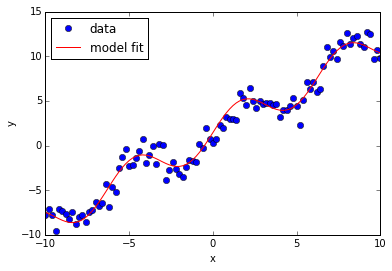

In [38]:
fit_y = f_b_sin(x, fit_a, fit_b, fit_c)
plt.plot(x,     y, linestyle='' , marker='o', color='blue', label='data')
plt.plot(x, fit_y, linestyle='-', color='red', label='model fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(numpoints=1, loc='upper left')

### Nonlinear Curve Fitting

### If a function is non-linear in one of the parameters to be *fit*

In this case we need to use something more involved, such as `scipy.optimize`.

$y = a + bx + e^{ax}$

In [39]:
import numpy as np
import scipy.optimize

* The function to fit:

In [40]:
def f(x, a, b, c):
    return np.exp(a*x) + b*x + c


* Generate some simulated data:

In [43]:
x = np.linspace(0.0, 4.0, 50)
y = f(x, 2.5, 1.3, 0.5)
y += 0.2*np.random.normal(size=len(x))

* Fit the data:

In [45]:
r = scipy.optimize.curve_fit(f, x, y)
print(r)

(array([ 2.50000016,  1.30367848,  0.4842005 ]), array([[  3.67102199e-12,  -3.86676399e-08,   4.54488780e-08],
       [ -3.86676399e-08,   9.31772365e-04,  -1.52767623e-03],
       [  4.54488780e-08,  -1.52767623e-03,   3.38833522e-03]]))


In [46]:
# Extract the best-fit parameters
(a, b, c) = r[0]
print(a,b,c)

2.50000015628 1.30367848114 0.48420050002


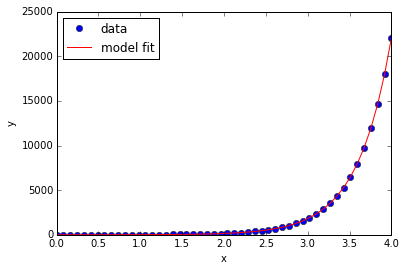

In [47]:
plt.plot(x, y, linestyle='' , marker='o', color='blue', label='data')
plt.plot(x, f(x, a, b, c), linestyle='-', color='red' , label='model fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(numpoints=1, loc='upper left')

#### Uncertainties in Fit Parameters
How do we estimate the uncertainties in the fit parameters $\vec{a}=(a_1, a_2, \ldots, a_M)$?
* `scipy.optimize.curve_fit` returns:
  * `popt`: array
Optimal values for the parameters so that the sum of the squared error is minimized.
  * `pcov`: 2d array
The estimated covariance of `popt`. The diagonals provide the variance of the parameter estimate.
* The standard deviation of $a_i$ is $\sigma_i = \sqrt{C_{ii}}$.
  * The 68% confidence interval for $a_i$ is $\pm \sigma_i$.
  * The 95% confidence interval for $a_i$ is $\pm 2\sigma_i$.
  * etc.

#### Example: Nonlinear Curve Fitting, Continued
The results of the fit:

In [48]:
popt, pcov = scipy.optimize.curve_fit(f, x, yn)
for i in range(len(popt)):
    params = (i, popt[i], np.sqrt(pcov[i,i]))
    print('%d: %-8g +/- %g' % params)


0: 2.5      +/- 2.40323e-06
1: 1.33016  +/- 0.0382858
2: 0.503916 +/- 0.0730082


In [49]:
print(pcov) 

[[  5.77549120e-12  -6.08383097e-08   7.15178560e-08]
 [ -6.08383097e-08   1.46580140e-03  -2.40323648e-03]
 [  7.15178560e-08  -2.40323648e-03   5.33019536e-03]]


In [50]:
print(np.diag(pcov))

[  5.77549120e-12   1.46580140e-03   5.33019536e-03]
